<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-deeplearning/blob/master/quotation_kim/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

word2vec 원리 이해하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
doc = 'you will never know until you try'
token_list = word_tokenize(doc)
tokens = list(set(token_list))
tokens

['will', 'you', 'until', 'try', 'know', 'never']

In [4]:
onehot=np.identity(len(tokens)).tolist()

onehot_vector = []
for vec in onehot:
    onehot_vector.append([vec])
onehot_vector

[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]]

In [5]:
dic = dict(zip(tokens, onehot_vector))
dic

{'know': [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 'never': [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]],
 'try': [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]],
 'until': [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
 'will': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 'you': [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]}

In [6]:
y = []
for token in token_list:
    for word in dic.keys(): #토큰과 단어가 일치하면 토큰의 원핫벡터를 리스트에 추가
        if token == word:
            y.append(dic[word])
y

[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]],
 [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]],
 [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
 [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]]

In [7]:
df = pd.DataFrame(y, columns=['onehot'], index=token_list)
df

,onehot
you,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
will,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
never,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
know,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
until,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
you,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
try,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"


In [8]:
y_new = []
for i in y:
    y_new.append(sum(i,[]))
y_new

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

In [9]:
win_size = 1
x = []

for i in range(len(y)):
    tmp = []
    if i-win_size < 0 : # i가 윈도우사이즈보다 작으면 작은만큼 앞이 잘림
        tmp = y[:i]+y[(i+1):(i+win_size+1)]
    elif i+win_size >= len(y) :    # i가 윈도우사이즈보다 크면 큰만큼 뒤가 잘림
        tmp = y[(i-win_size):i] + y[(i+1):]
    else:
        tmp = y[(i-win_size):i] + y[(i+1):(i+win_size+1)]
    x.append(tmp)
x

[[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]],
 [[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]],
 [[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]],
 [[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]], [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]],
 [[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]],
 [[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]],
 [[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]]]

In [10]:
# x를 np.array화
x_new = []
for i in x:
    x_new.append(np.array(sum(i,[])))
x_new

[array([[1., 0., 0., 0., 0., 0.]]), array([[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]]), array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]]), array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.]]), array([[0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.]]), array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]]), array([[0., 1., 0., 0., 0., 0.]])]

In [11]:
# hidden layer 계산
vector_dim = 4
w1 = np.random.rand(len(tokens),vector_dim)
w2 = np.random.rand(vector_dim, len(tokens))

h = []
for x_vecs in x_new:
    tmp = []
    for x_vector in x_vecs:
        tmp.append(np.dot(w1.T,x_vector.T))
    h.append(tmp)
h

[[array([0.16148631, 0.27245741, 0.36638065, 0.86763207])],
 [array([0.45047292, 0.95328374, 0.77339987, 0.13493004]),
  array([0.0853924 , 0.91643069, 0.96874   , 0.50680059])],
 [array([0.16148631, 0.27245741, 0.36638065, 0.86763207]),
  array([0.36994143, 0.6553077 , 0.8740397 , 0.16058796])],
 [array([0.0853924 , 0.91643069, 0.96874   , 0.50680059]),
  array([0.12128469, 0.67707309, 0.36476997, 0.3876022 ])],
 [array([0.36994143, 0.6553077 , 0.8740397 , 0.16058796]),
  array([0.45047292, 0.95328374, 0.77339987, 0.13493004])],
 [array([0.12128469, 0.67707309, 0.36476997, 0.3876022 ]),
  array([0.02263591, 0.13680572, 0.20744735, 0.90980475])],
 [array([0.45047292, 0.95328374, 0.77339987, 0.13493004])]]

In [12]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [13]:
# 예상치 계산
y_hat = []
for h_vecs in h:
    tmp = []
    for h_vector in h_vecs:
        tmp.append(softmax(np.dot(w2.T,h_vector)))
    y_hat.append(tmp)
y_hat

[[array([0.12381544, 0.12774951, 0.21054946, 0.15657451, 0.20014874,
         0.18116234])],
 [array([0.1067702 , 0.14458775, 0.24998067, 0.16726497, 0.22299975,
         0.10839667]),
  array([0.11031891, 0.13564039, 0.25879708, 0.16067115, 0.21951398,
         0.1150585 ])],
 [array([0.12381544, 0.12774951, 0.21054946, 0.15657451, 0.20014874,
         0.18116234]),
  array([0.11666135, 0.14213969, 0.23645521, 0.16958365, 0.22457079,
         0.11058931])],
 [array([0.11031891, 0.13564039, 0.25879708, 0.16067115, 0.21951398,
         0.1150585 ]),
  array([0.12504292, 0.14908792, 0.22186548, 0.16199422, 0.19406787,
         0.1479416 ])],
 [array([0.11666135, 0.14213969, 0.23645521, 0.16958365, 0.22457079,
         0.11058931]),
  array([0.1067702 , 0.14458775, 0.24998067, 0.16726497, 0.22299975,
         0.10839667])],
 [array([0.12504292, 0.14908792, 0.22186548, 0.16199422, 0.19406787,
         0.1479416 ]),
  array([0.13312092, 0.12989879, 0.19641053, 0.15405131, 0.18660929,
      

In [14]:
# loss 계산
L = []
for predict in y_hat:
    tmp = []
    for j in range(len(predict)):
        tmp.append(np.log(predict[j]) * y[j])
    L.append(np.sum(tmp))
loss = -np.sum(L)
loss

24.520549355753804

In [15]:
# w 업데이트
alpha = 0.01
diff = []
h_layer = []
x_layer = []

for i in range(len(y_new)):
    for j in range(len(y_hat[i])):
        diff.append(y_hat[i][j] - y_new[i])
        h_layer.append(h[i][j])
        x_layer.append(x[i][j])

a = np.dot(np.array(x_layer).T, np.dot(w2, np.array(diff).T).T)
b = []
for i in range(len(a)):
    b.append(a[i][0])

w2 = w2 - alpha*np.dot(np.array(h_layer).T, np.array(diff))
w1 = w1 - b

np.array(w1), np.array(w2)

(array([[-0.03916426,  0.18004872, -0.12771618,  0.88522318],
        [ 0.21627975,  0.85054879,  0.81933688, -0.04941542],
        [ 0.19602503,  0.7273982 ,  0.46982974,  0.18853508],
        [-0.12270432,  0.19950764,  0.11700654,  0.63386815],
        [ 0.36945911,  0.7183683 ,  0.58285594,  0.57739052],
        [-0.01724845,  0.63760711,  1.0636552 ,  0.36950639]]),
 array([[0.10297117, 0.24487551, 0.46937793, 0.43707317, 0.61841554,
         0.35390336],
        [0.07904653, 0.36381776, 0.55475915, 0.27244602, 0.32135401,
         0.16280042],
        [0.69241261, 0.63783251, 0.91466916, 0.79202918, 0.97247702,
         0.35653249],
        [0.4420611 , 0.39185939, 0.72508402, 0.53028524, 0.69391761,
         0.94591959]]))

함수화해서 epoch 주기

In [16]:
def loss(y_hat,y):
    L = []
    for i, predict in enumerate(y_hat):
        tmp = []
        for j in range(len(predict)):
            tmp.append(np.log(predict[j]) * y[i])
        L.append(np.sum(tmp))
    loss_result = -np.sum(L)
    return loss_result

In [17]:
def w_update(learning_rate,y_hat,y,w1,w2):

    diff = []
    h_layer = []
    x_layer = []

    y_new = []
    for i in y:
        y_new.append(sum(i,[]))

    for i in range(len(y_new)):
        for j in range(len(y_hat[i])):
            diff.append(y_hat[i][j] - y_new[i])
            h_layer.append(h[i][j])
            x_layer.append(x[i][j])

    a = np.dot(np.array(x_layer).T, np.dot(w2, np.array(diff).T).T)
    b = []
    for i in range(len(a)):
        b.append(a[i][0])
    c = np.dot(np.array(h_layer).T, np.array(diff))

    w2 -= learning_rate * c
    w1 -= b
    return w1, w2

In [18]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [19]:
doc = 'you will never know until you try'
token_list = word_tokenize(doc)
tokens = list(set(token_list))

onehot=np.identity(len(tokens)).tolist()
onehot_vector = []
for vec in onehot:
    onehot_vector.append([vec])

dic = dict(zip(tokens, onehot_vector))

y = []
for token in token_list:
    for word in dic.keys(): #토큰과 단어가 일치하면 토큰의 원핫벡터를 리스트에 추가
        if token == word:
            y.append(dic[word])

y_new = []
for i in y:
    y_new.append(sum(i,[]))

win_size = 1
x = []

for i in range(len(y)):
    tmp = []
    if i-win_size < 0 : # i가 윈도우사이즈보다 작으면 작은만큼 앞이 잘림
        tmp = y[:i]+y[(i+1):(i+win_size+1)]
    elif i+win_size >= len(y) :    # i가 윈도우사이즈보다 크면 큰만큼 뒤가 잘림
        tmp = y[(i-win_size):i] + y[(i+1):]
    else:
        tmp = y[(i-win_size):i] + y[(i+1):(i+win_size+1)]
    x.append(tmp)

x_new = []
for i in x:
    x_new.append(np.array(sum(i,[])))

vector_dim = 4
w1 = np.random.rand(len(tokens),vector_dim)
w2 = np.random.rand(vector_dim, len(tokens))

h = []
for x_vecs in x_new:
    tmp = []
    for x_vector in x_vecs:
        tmp.append(np.dot(w1.T,x_vector.T))
    h.append(tmp)

y_hat = []
for h_vecs in h:
    tmp = []
    for h_vector in h_vecs:
        tmp.append(softmax(np.dot(w2.T,h_vector)))
    y_hat.append(tmp)

loss_history = []
cnt_history = []
cnt = 0
for i in range(10000):
    w_update(0.01,y_hat,y,w1,w2)

    h = []
    for x_vecs in x_new:
        tmp = []
        for x_vector in x_vecs:
            tmp.append(np.dot(w1.T,x_vector.T))
        h.append(tmp)

    y_hat = []
    for h_vecs in h:
        tmp = []
        for h_vector in h_vecs:
            tmp.append(softmax(np.dot(w2.T,h_vector)))
        y_hat.append(tmp)
    
    loss(y_hat,y)
    loss_history.append(loss(y_hat,y))

    cnt += 1
    cnt_history.append(cnt)


    if i%2000 == 0:
        print('로스:{}, 예측값:{}'.format(loss(y_hat,y), y_hat))
        # print(w1,w2)

로스:19.52535592353386, 예측값:[[array([0.15583762, 0.12683363, 0.16589648, 0.09982065, 0.09239611,
       0.3592155 ])], [array([0.19661345, 0.07993897, 0.23092626, 0.12207117, 0.13972194,
       0.2307282 ]), array([0.20545366, 0.07082217, 0.2411746 , 0.10129752, 0.2348195 ,
       0.14643255])], [array([0.15583762, 0.12683363, 0.16589648, 0.09982065, 0.09239611,
       0.3592155 ]), array([0.18844154, 0.06850612, 0.24197045, 0.08051661, 0.14139557,
       0.27916971])], [array([0.20545366, 0.07082217, 0.2411746 , 0.10129752, 0.2348195 ,
       0.14643255]), array([0.15068415, 0.16876016, 0.18012865, 0.17460532, 0.16778667,
       0.15803504])], [array([0.18844154, 0.06850612, 0.24197045, 0.08051661, 0.14139557,
       0.27916971]), array([0.19661345, 0.07993897, 0.23092626, 0.12207117, 0.13972194,
       0.2307282 ])], [array([0.15068415, 0.16876016, 0.18012865, 0.17460532, 0.16778667,
       0.15803504]), array([0.1857124 , 0.14218391, 0.17236913, 0.14660001, 0.16484082,
       0.188293

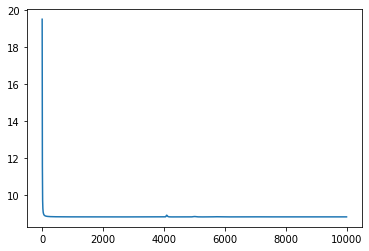

In [20]:
import matplotlib.pyplot as plt
plt.plot(cnt_history,loss_history)
plt.show()